In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import cluster
import urllib
from tools import pca_reduce, plot

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# Culstering Examples

## Handwritten digits (MNIST)

Dataset of 70'000 handwritten digit images of 28x28 pixel each

In [4]:
fname = 'mnist.npz'
#fname = 'galaxy.npz'

X = np.load(fname)['X']
y = np.load(fname)['y']

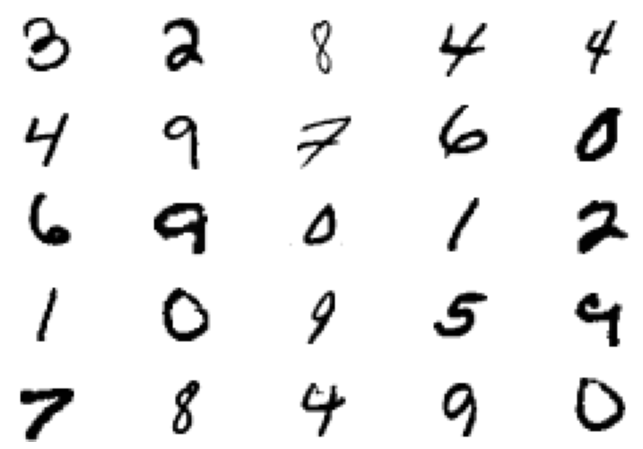

In [5]:
plot(X)

Since the original data dimension is 784 (= 28 x 28), we will use PCA to reduce this (More explanation under the `prepreocessing` notebook)

In [6]:
X_reduced = pca_reduce(X, 20)

In [7]:
centroids, labels, _ = cluster.k_means(X_reduced, 10)

Let's visualize the cluster assignments in a plot of the first 2 PCA components

Text(0, 0.5, 'component 2')

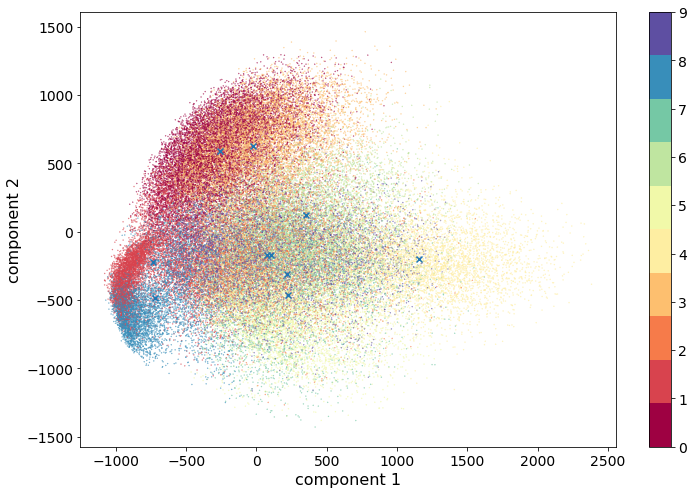

In [8]:
plt_data = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=0.1, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x')
plt.xlabel('component 1')
plt.ylabel('component 2')
#plt.savefig('mnist_pca2_kmeans_cluster.png', bbox_inches='tight')

We can see how well the separation of digits worked doing a heatmap

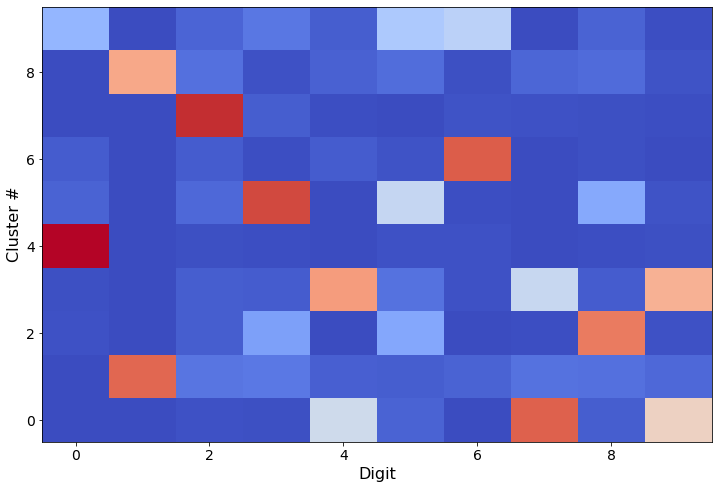

In [9]:
h = plt.hist2d(y, labels, bins=[np.linspace(-0.5,9.5, 11),
                                 np.linspace(-0.5,np.max(labels)+0.5, int(np.max(labels)+2))
                                ]
                         ,cmap='coolwarm');
plt.gca().set_xlabel('Digit')
plt.gca().set_ylabel('Cluster #')
plt.savefig('mnist_confusion.png', bbox_inches='tight')

Let's check the content of some clusters:

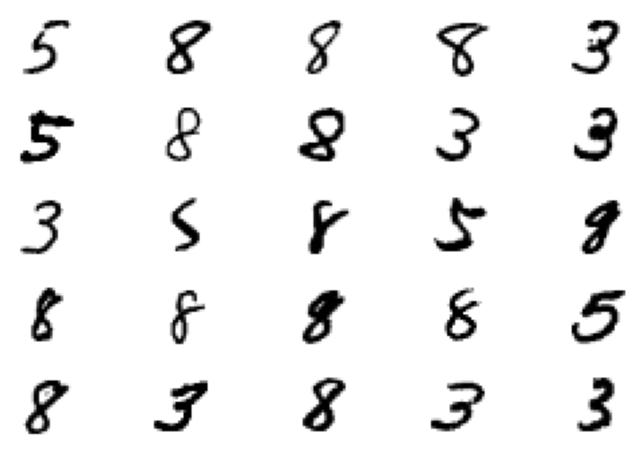

In [10]:
plot(X[labels == 2])

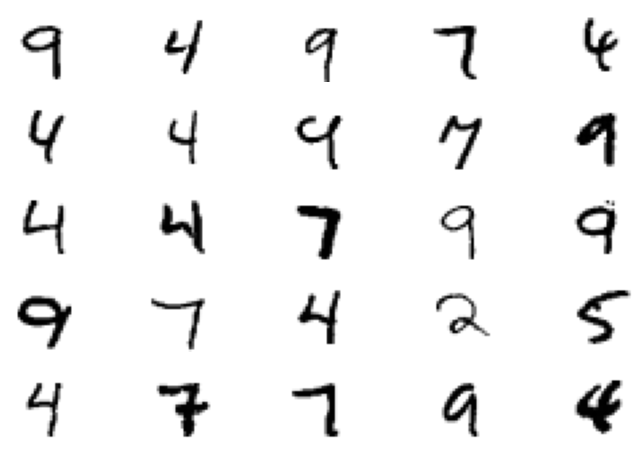

In [11]:
plot(X[labels == 3])

# Chipotle locations in the US

Chipotle (mexican fast fod chain) locations in longitude / latitude

In [12]:
# obtain file from https://www.kaggle.com/jeffreybraun/chipotle-locations
df = pd.read_csv('chipotle_stores.csv')

In [13]:
df

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416


In [14]:
X = df[['longitude', 'latitude']].values

In [15]:
! wget 'https://eriqande.github.io/rep-res-web/lectures/lecture_figs/making-maps-unnamed-chunk-12-1.png'
us_img = plt.imread("making-maps-unnamed-chunk-12-1.png")

--2022-09-13 10:07:25--  https://eriqande.github.io/rep-res-web/lectures/lecture_figs/making-maps-unnamed-chunk-12-1.png
Resolving eriqande.github.io (eriqande.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to eriqande.github.io (eriqande.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256065 (250K) [image/png]
Saving to: ‘making-maps-unnamed-chunk-12-1.png.5’

making-maps-unnamed 100%[===================>] 250.06K  --.-KB/s    in 0.06s   

2022-09-13 10:07:25 (3.99 MB/s) - ‘making-maps-unnamed-chunk-12-1.png.5’ saved [256065/256065]



(25.0, 50.0)

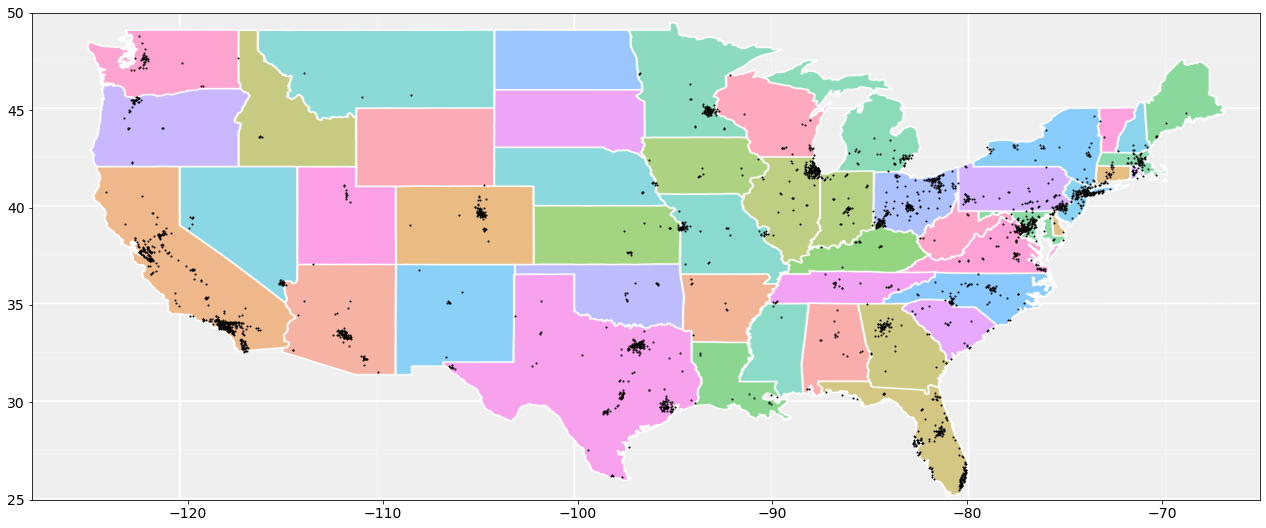

In [16]:
fig, ax = plt.subplots(1,1, figsize=(22,15))
ax.imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.5)
ax.scatter(df.longitude, df.latitude, s=1, c='k')

ax.set_xlim(-128, -65)
ax.set_ylim(25, 50)

## K-means

In [17]:
centroids, labels, _ = cluster.k_means(X, 48)

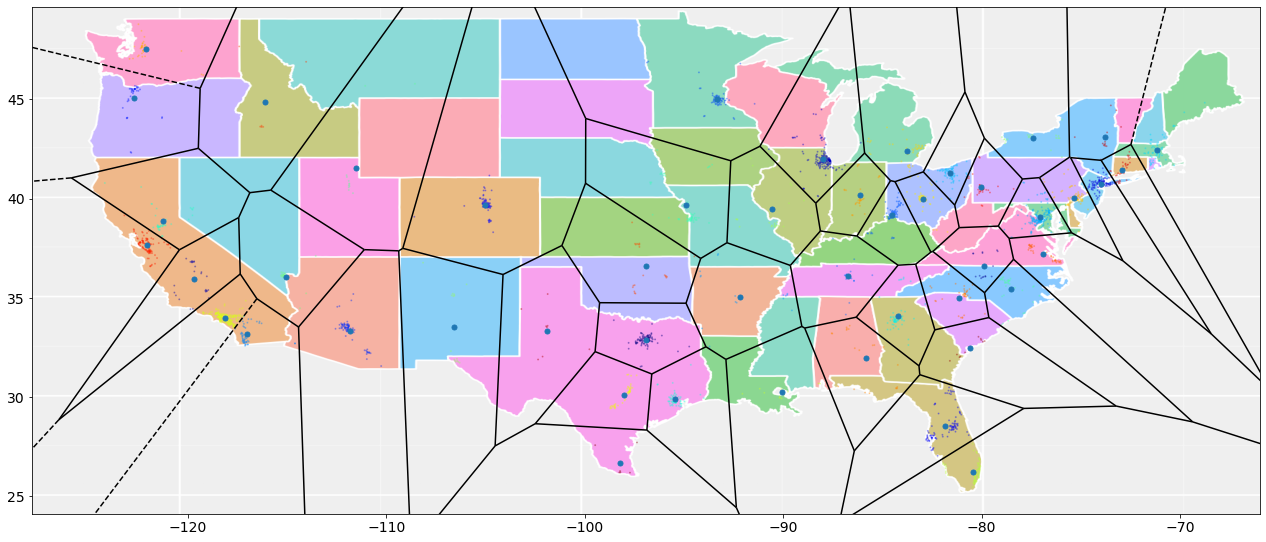

In [18]:
fig, ax = plt.subplots(1,1, figsize=(22,15))

plt.imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.5)

vor = Voronoi(centroids,)
voronoi_plot_2d(vor, ax=plt.gca(), line_colors='k', show_vertices=False, show_points=True, point_size=10, line_width=1.5);

plt.scatter(df.longitude, df.latitude, s=1, c=labels, cmap='jet', alpha=0.3)

## DBSCAN

In [19]:
core_samples, labels = cluster.dbscan(X, eps=0.5, min_samples=10)

In [20]:
np.max(labels)

35

(25.0, 50.0)

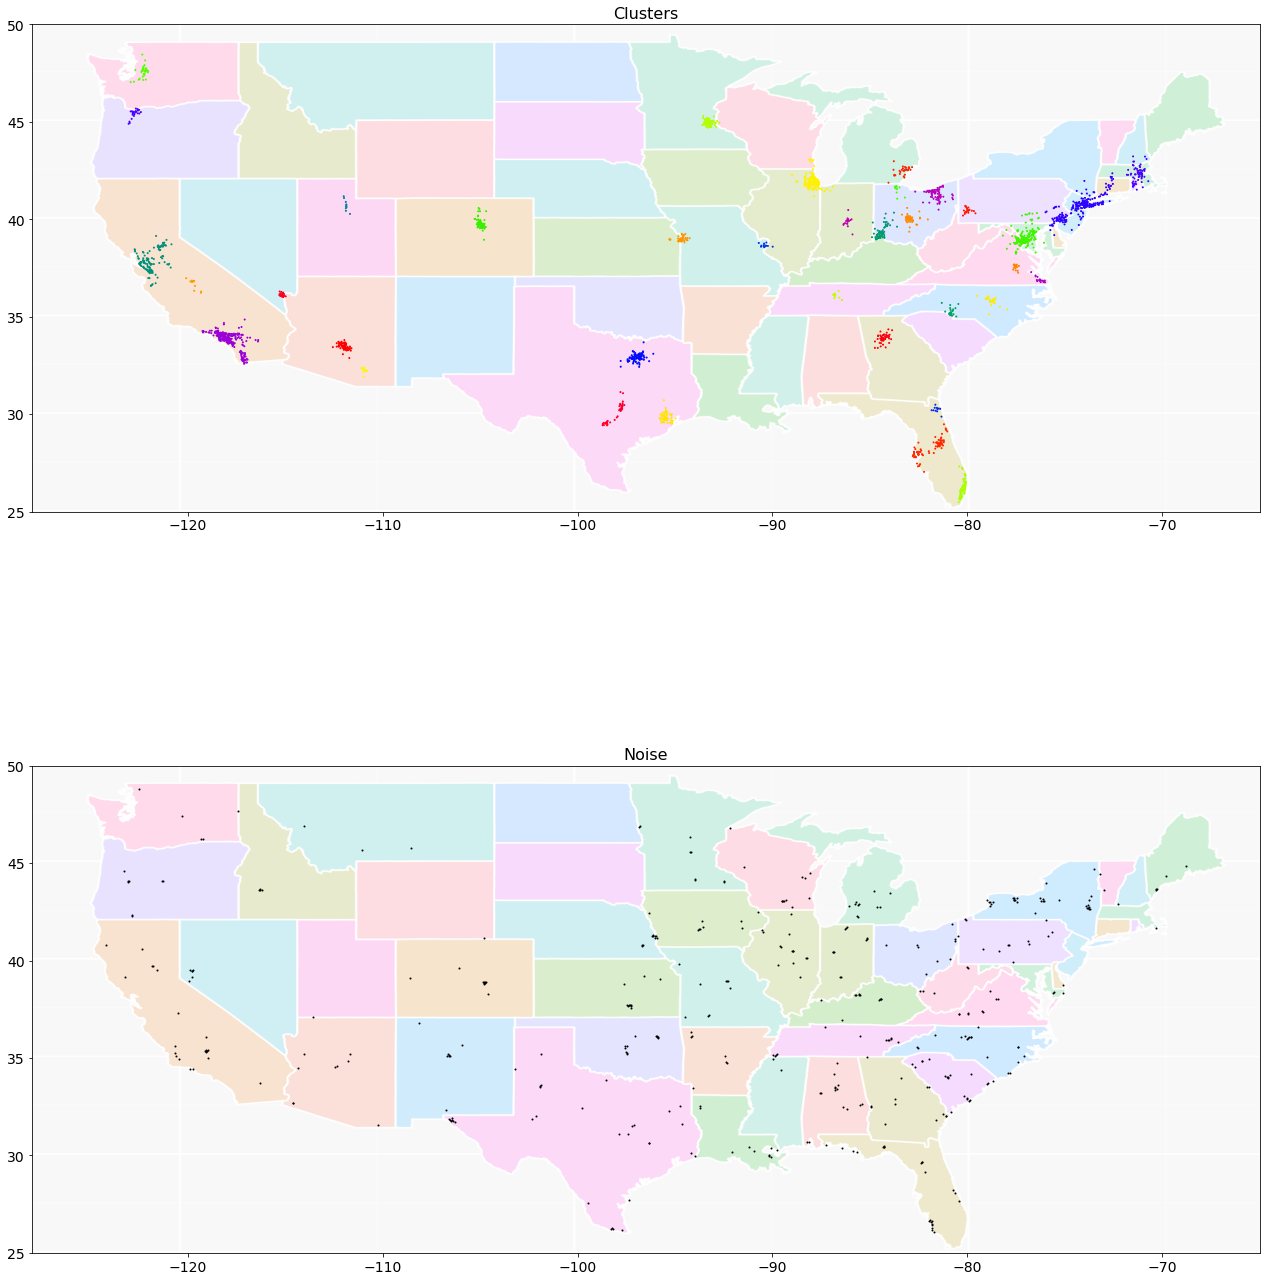

In [21]:
fig, ax = plt.subplots(2,1, figsize=(22,25))

mask = labels >= 0

ax[0].scatter(df.longitude[mask], df.latitude[mask], s=1, c=labels[mask], cmap='prism')
ax[0].set_title('Clusters')

ax[0].imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.2)
ax[0].set_xlim(-128, -65)
ax[0].set_ylim(25, 50)

ax[1].scatter(df.longitude[~mask], df.latitude[~mask], s=1, c='k')
ax[1].set_title('Noise')

ax[1].imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.2)
ax[1].set_xlim(-128, -65)
ax[1].set_ylim(25, 50)